In [1]:
# installing prophet
!pip install -Uq prophet

In [2]:
# standard imports
import pandas as pd
from prophet import Prophet
from prophet.serialize import model_to_json

In [3]:
# loading dataset
df = pd.read_csv('/content/dataset_prophet.csv')
df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


In [4]:
# renaming the features as per the requirement
df.columns = ['ds', 'y']
df.head()

,ds,y
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [5]:
# converting ds to time-based series
df['ds'] = pd.to_datetime(df['ds'])

In [6]:
# getting info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3650 non-null   datetime64[ns]
 1   y       3650 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 57.2 KB


In [7]:
# model training
model = Prophet(daily_seasonality=False).fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_fibk_g/846alcth.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe_fibk_g/aq9fb3pe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59811', 'data', 'file=/tmp/tmpe_fibk_g/846alcth.json', 'init=/tmp/tmpe_fibk_g/aq9fb3pe.json', 'output', 'file=/tmp/tmpe_fibk_g/prophet_model_yvo7wc8/prophet_model-20240101054436.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:44:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:44:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [8]:
# making predictions
future = model.make_future_dataframe(periods=365, freq='D')
pred = model.predict(future)

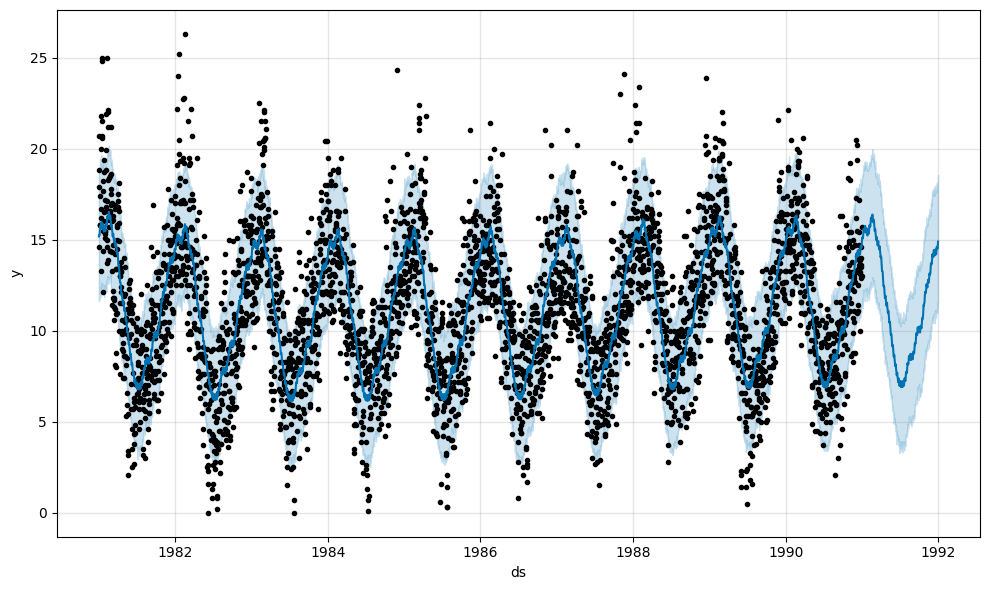

In [9]:
# plotting predictions
model.plot(pred);

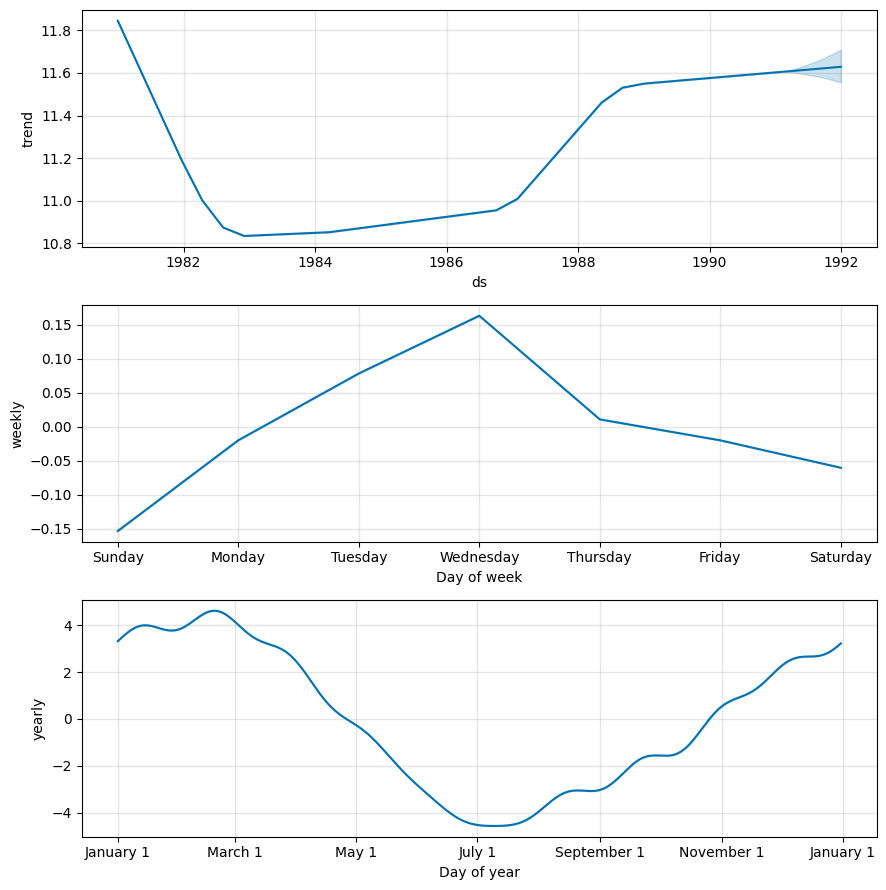

In [10]:
# plotting components
model.plot_components(pred);

In [11]:
# creating df of predicted values
pred_df = pd.DataFrame(pred.tail(365)[['ds', 'yhat']])
pred_df

,ds,yhat
3650,1991-01-01,14.959957
3651,1991-01-02,15.122430
3652,1991-01-03,15.047851
3653,1991-01-04,15.093722
3654,1991-01-05,15.127735
...,...,...
4010,1991-12-27,14.527450
4011,1991-12-28,14.546066
4012,1991-12-29,14.517537
4013,1991-12-30,14.720068


In [12]:
# saving the model
with open('model.json', 'w') as file:
    file.write(model_to_json(model))